In [1]:
import matplotlib.style
import pandas as pd
import numpy as np
import seaborn as sns
import regex as re
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import chi2_contingency

matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = [8, 5]

In [2]:
df = pd.read_csv('LUBS5990M dataset ICO.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1606 non-null   int64  
 1   success            1606 non-null   int64  
 2   tokenNum           1359 non-null   float64
 3   teamSize           1606 non-null   int64  
 4   country            1606 non-null   object 
 5   categories         1606 non-null   object 
 6   overallrating      1606 non-null   float64
 7   offered_ownership  1065 non-null   float64
 8   enddate            1606 non-null   object 
 9   startdate          1601 non-null   object 
 10  tokenName          1574 non-null   object 
 11  tokenPrice         1425 non-null   object 
 12  tokenType          1148 non-null   object 
 13  platform           1475 non-null   object 
 14  acceptingCurrency  1379 non-null   object 
 15  softcap            1577 non-null   float64
 16  hardcap            1577 

,id,success,tokenNum,teamSize,country,categories,overallrating,offered_ownership,enddate,startdate,tokenName,tokenPrice,tokenType,platform,acceptingCurrency,softcap,hardcap,whitepaper,video,socialMedia
0,1,0,1.275000e+07,14,Estonia,"Charity,Education,Health,Smart Contract",2.6,0.80,15/04/2018,01/03/2018,REDLcoin,1 REDL = 1 USD,ERC20,Ethereum,ETH,1.0,1.0,1.0,1.0,0.0
1,2,0,0.000000e+00,13,Singapore,Infrastructure,2.1,0.70,25/08/2017,25/07/2017,SLOGN,1 SLOGN= 0.0001 ETH,"8,000,000,000",NaN,ETH,1.0,1.0,1.0,1.0,0.0
2,3,1,2.220000e+09,9,Singapore,"Platform,Business services",2.5,0.37,23/11/2017,18/11/2017,TNB,1 TNB = 0.00005 ETH,ERC20,Ethereum,NaN,1.0,1.0,1.0,0.0,3.0
3,4,0,4.000000e+07,0,USA,"Cryptocurrency,Business services,Entertainment...",1.5,0.80,26/04/2018,26/03/2018,GIF,1GIF = 0.00969635 USD,ERC20,Ethereum,"ETH, BTC, LTC",1.0,1.0,1.0,1.0,0.0
4,5,1,4.500000e+07,7,Mexico,"Internet,Infrastructure,Cryptocurrency,Busines...",2.1,0.50,18/05/2018,22/04/2018,AIRE,1 ETH = 4440 AIRE,ERC20,Ethereum,"ETH , BTC",1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,1602,0,3.000000e+08,14,Marshall Islands,Real estate,2.7,0.30,25/05/2018,25/02/2018,CKey,1 CKey = 0.08 USD,ERC20,Ethereum,ETH,1.0,1.0,1.0,1.0,0.0
1602,1603,0,1.700000e+07,9,Germany,"Platform,Cryptocurrency,Business services,Soft...",2.3,0.85,23/12/2017,16/12/2017,CLICK,1 CLICK = 0.20 EUR,ERC20,Ethereum,ETH,0.0,1.0,1.0,1.0,0.0
1603,1604,0,6.500000e+08,10,Estonia,"Artificial Intelligence,Cryptocurrency,Infrast...",2.9,0.86,06/04/2018,06/03/2018,DVR,1 DVR = 0.00005 ETH,ERC20,Ethereum,"ETH, BTC, LTC, BCH",0.0,1.0,1.0,1.0,0.0
1604,1605,0,0.000000e+00,7,Singapore,"Cryptocurrency,Investment,Platform",2.1,NaN,28/02/2018,01/02/2018,Bitpaction Share,1 BPS = 0.23 USD,ERC20,NaN,NaN,0.0,0.0,1.0,0.0,0.0


In [3]:
df.describe()

,id,success,tokenNum,teamSize,overallrating,offered_ownership,softcap,hardcap,whitepaper,video,socialMedia
count,1606.000000,1606.000000,1.359000e+03,1606.000000,1606.000000,1065.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000
mean,803.500000,0.551059,2.015268e+13,11.168120,2.850125,1.143577,0.435003,0.691820,0.951173,0.672796,0.636018
std,463.756581,0.497541,6.264666e+14,8.042357,0.817257,18.407222,0.495915,0.461888,0.215574,0.469341,1.130752
min,1.000000,0.000000,0.000000e+00,0.000000,0.800000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,402.250000,0.000000,7.000000e+06,6.000000,2.300000,0.450000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,803.500000,1.000000,5.500000e+07,10.000000,2.800000,0.600000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,1204.750000,1.000000,2.514804e+08,15.000000,3.500000,0.740000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1606.000000,1.000000,2.260000e+16,67.000000,4.800000,601.250000,1.000000,1.000000,1.000000,1.000000,3.000000


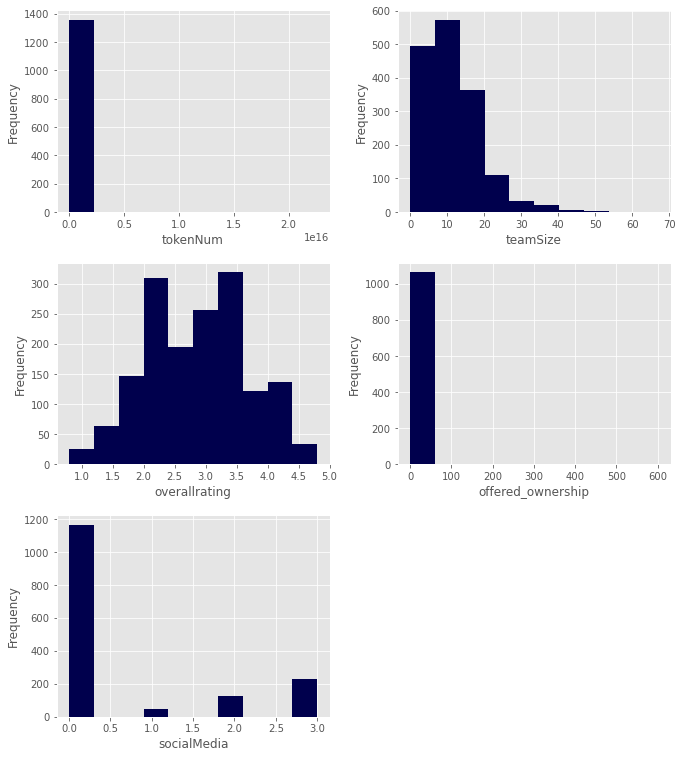

In [4]:
fig = plt.figure()
fig.set_figheight(13)
fig.set_figwidth(11)
plt.subplot2grid(shape=(3, 2), loc=(0, 0), colspan=1)
df.tokenNum.plot(kind='hist', colormap='seismic').set_xlabel('tokenNum')
plt.subplot2grid(shape=(3, 2), loc=(0, 1), colspan=1)
df.teamSize.plot(kind='hist', ax=plt.gca(), colormap='seismic').set_xlabel('teamSize')
plt.subplot2grid(shape=(3, 2), loc=(1, 0), colspan=1)
df.overallrating.plot(kind='hist', ax=plt.gca(), colormap='seismic').set_xlabel('overallrating')
plt.subplot2grid(shape=(3, 2), loc=(1, 1), colspan=1)
df.offered_ownership.plot(kind='hist', ax=plt.gca(), colormap='seismic').set_xlabel('offered_ownership')
plt.subplot2grid(shape=(3, 2), loc=(2, 0), colspan=1)
df.socialMedia.plot(kind='hist', ax=plt.gca(), colormap='seismic').set_xlabel('socialMedia')
plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.savefig('hist_raw.png', dpi=300, bbox_inches = 'tight', pad_inches=0)

In [5]:
df = df.drop('id', axis=1)

In [6]:
duplicate_ids = []
for index, value in enumerate(df.duplicated(subset = 'tokenName', keep = False)):
    if value:
        duplicate_ids.append(index)

duplicates = df.loc[duplicate_ids]
duplicates.tokenName.unique()

array(['CBC', 'CAS', nan, 'RTC', 'SCR', 'RBC', 'HUB', 'PCO', 'ACT', 'BTN',
       'TIO', 'BFC', 'AVA', 'REF', 'SPC', 'NEWS', 'EVN', 'BEE', 'SHC',
       'WPC', 'CEL', 'BNT', 'ETN', 'CHX', 'BST', 'CAR', 'SCT', 'SMT',
       'CBT', 'ACO', 'TT', 'EST', 'AID', 'TLC', 'STC', 'WISH', 'LST',
       'DTT', 'DOC', 'TBX', 'TKT', 'GRD', 'MTC', 'LNC', 'PLM', 'BMC',
       'OGC', 'WRL', 'THT', 'AHT', 'ERT', 'ECT', 'ORO', 'VIN', 'GLS',
       'LBT', 'VIT', 'MASS', 'SYC', 'EDU', 'SET', 'CAT', 'BITS', 'ARNA',
       'CFT', 'LIKE', 'ROC', 'RCA', 'JOY', 'ITC', 'WIN', 'GBC', 'SHP',
       'AIC'], dtype=object)

In [7]:
duplicates[duplicates.tokenName == 'SCR']

,success,tokenNum,teamSize,country,categories,overallrating,offered_ownership,enddate,startdate,tokenName,tokenPrice,tokenType,platform,acceptingCurrency,softcap,hardcap,whitepaper,video,socialMedia
36,1,122400000.0,16,Cyprus,"Business services,Investment,Internet",3.0,0.68,11/03/2018,11/02/2018,SCR,"1 ETH = 3,000 SCR",ERC20,Ethereum,ETH,0.0,0.0,1.0,1.0,0.0
1213,1,NaN,30,Belarus,"Sports,Media,Entertainment,Cryptocurrency,Casi...",4.0,0.93,11/02/2018,14/01/2018,SCR,1 SCR = 1 USD,NaN,Separate blockchain,"ETH, BTC",0.0,1.0,1.0,1.0,0.0


In [8]:
token_names = {}
for index, row in enumerate(df.tokenName):
    token_names[index] = row

df = df.drop('tokenName', axis=1)

In [9]:
df = df.drop('tokenPrice', axis=1)

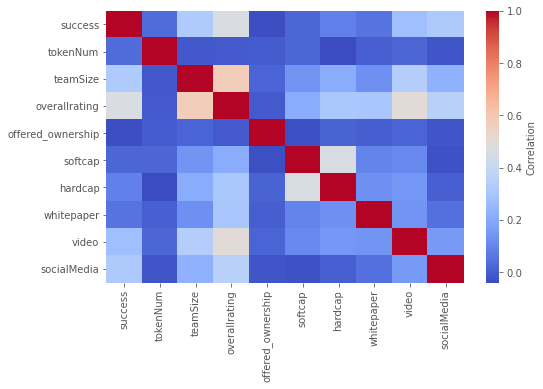

In [10]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values).collections[0].colorbar.set_label(
    'Correlation', size=10)
plt.savefig('correlation.png', dpi=300, bbox_inches = 'tight', pad_inches=0)

success - 0%
tokenNum - 15%
teamSize - 0%
country - 0%
categories - 0%
overallrating - 0%
offered_ownership - 34%
enddate - 0%
startdate - 0%
tokenType - 29%
platform - 8%
acceptingCurrency - 14%
softcap - 2%
hardcap - 2%
whitepaper - 2%
video - 2%
socialMedia - 2%


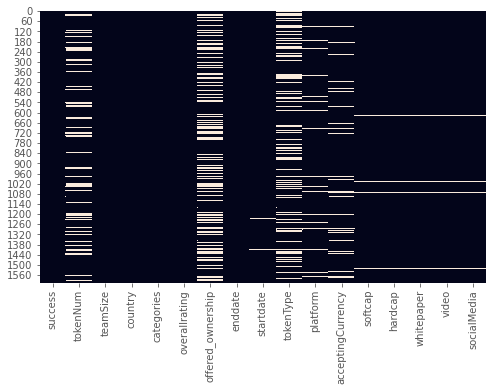

In [11]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

sns.heatmap(df[df.columns].isnull(), cbar=False)
plt.savefig('missing_values.png', dpi=300, bbox_inches = 'tight', pad_inches=0)

In [12]:
df = df.dropna(subset=['whitepaper'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1577 entries, 0 to 1605
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   success            1577 non-null   int64  
 1   tokenNum           1332 non-null   float64
 2   teamSize           1577 non-null   int64  
 3   country            1577 non-null   object 
 4   categories         1577 non-null   object 
 5   overallrating      1577 non-null   float64
 6   offered_ownership  1046 non-null   float64
 7   enddate            1577 non-null   object 
 8   startdate          1572 non-null   object 
 9   tokenType          1122 non-null   object 
 10  platform           1447 non-null   object 
 11  acceptingCurrency  1354 non-null   object 
 12  softcap            1577 non-null   float64
 13  hardcap            1577 non-null   float64
 14  whitepaper         1577 non-null   float64
 15  video              1577 non-null   float64
 16  socialMedia        1577 

In [13]:
for i, row in df.iterrows():
    if type(row['startdate']) == str:
        start = datetime.strptime(row['startdate'], "%d/%m/%Y")
    else:
        start = datetime.now()
    if type(row['enddate']) == str:
        end = datetime.strptime(row['enddate'], "%d/%m/%Y")
    else:
        end = datetime.now()

    df.loc[i, 'campaignDuration'] = (end-start).days

df = df.drop(['startdate', 'enddate'], axis=1)

In [14]:
def spread_plot(series):
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(8)
    plt.subplot2grid(shape=(1, 4), loc=(0, 0), colspan=1)
    series.plot(kind='box', colormap='seismic')
    plt.subplot2grid(shape=(1, 4), loc=(0, 1), colspan=3)
    series.plot(ax=plt.gca(), sharey = True, colormap='seismic', linewidth=0.5)
    plt.tick_params(left = False)

count    1529.000000
mean       41.440811
std        29.961613
min         1.000000
25%        28.000000
50%        31.000000
75%        51.000000
max       382.000000
Name: campaignDuration, dtype: float64


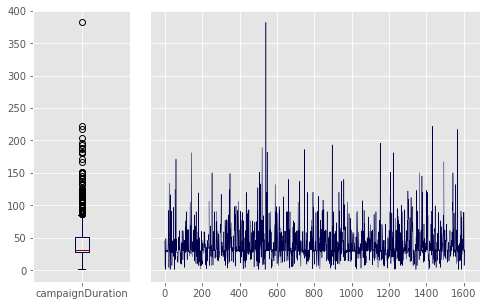

In [15]:
df.loc[(df.campaignDuration < 1), 'campaignDuration'] = np.nan

print(df['campaignDuration'].describe())
spread_plot(df['campaignDuration'])
plt.savefig('campaignDuration_raw.png', dpi=300, bbox_inches = 'tight', pad_inches=0)

count    1577.000000
mean        0.471421
std         0.258404
min         0.000000
25%         0.341772
50%         0.379747
75%         0.620253
max         1.000000
Name: campaignDuration, dtype: float64


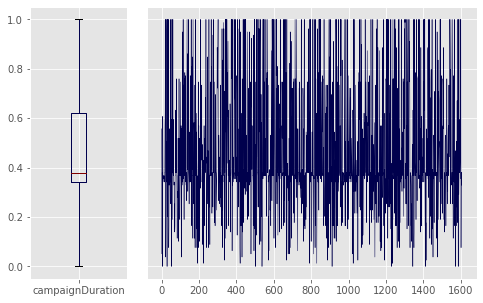

In [16]:
df.loc[(df.campaignDuration > 80), 'campaignDuration'] = 80
df['campaignDuration'].fillna(df['campaignDuration'].median(), inplace=True)

df['campaignDuration'] -= df['campaignDuration'].min()  # equivalent to df = df - df.min()
df['campaignDuration'] /= df['campaignDuration'].max()

print(df['campaignDuration'].describe())
spread_plot(df['campaignDuration'])
plt.savefig('campaignDuration_clean.png', dpi=300, bbox_inches = 'tight', pad_inches=0)

count    1.154000e+03
mean     2.373243e+13
std      6.798188e+14
min      1.000000e+00
25%      2.000000e+07
50%      8.000000e+07
75%      3.500000e+08
max      2.260000e+16
Name: tokenNum, dtype: float64


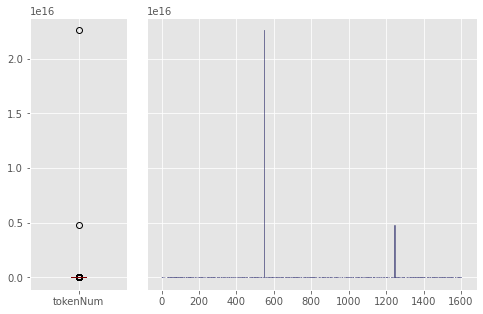

In [17]:
df.loc[(df.tokenNum < 1), 'tokenNum'] = np.nan
print(df['tokenNum'].describe())
spread_plot(df['tokenNum'])
plt.savefig('tokenNum_raw.png', dpi=300, bbox_inches = 'tight', pad_inches=0)

count    1577.000000
mean        0.426952
std         0.352824
min         0.000000
25%         0.152700
50%         0.320000
75%         0.800000
max         1.000000
Name: tokenNum, dtype: float64


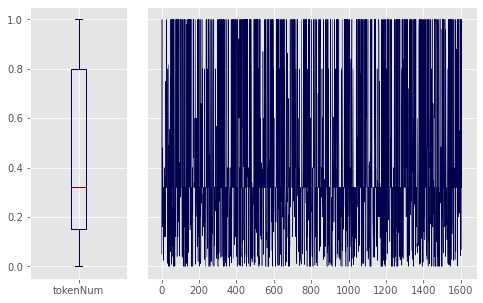

In [18]:
df.loc[(df.tokenNum > 250000000), 'tokenNum'] = 250000000
df['tokenNum'].fillna(df['tokenNum'].median(), inplace=True)

df['tokenNum'] -= df['tokenNum'].min()  # equivalent to df = df - df.min()
df['tokenNum'] /= df['tokenNum'].max()

print(df['tokenNum'].describe())
spread_plot(df['tokenNum'])
plt.savefig('tokenNum_clean.png', dpi=300, bbox_inches = 'tight', pad_inches=0)

count    1046.000000
mean        1.153346
std        18.573649
min         0.010000
25%         0.450000
50%         0.600000
75%         0.750000
max       601.250000
Name: offered_ownership, dtype: float64


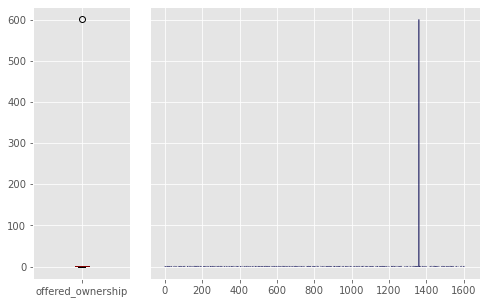

In [19]:
print(df['offered_ownership'].describe())
spread_plot(df['offered_ownership'])
plt.savefig('offered_ownership_raw.png', dpi=300, bbox_inches = 'tight', pad_inches=0)

count    1577.000000
mean        0.586145
std         0.167320
min         0.010000
25%         0.500000
50%         0.600000
75%         0.670000
max         1.000000
Name: offered_ownership, dtype: float64


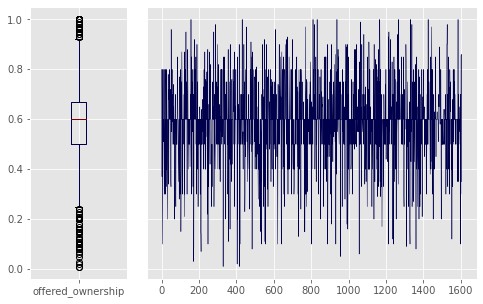

In [20]:
df.loc[(df.offered_ownership > 1), 'offered_ownership'] = np.nan
df['offered_ownership'].fillna(df['offered_ownership'].median(), inplace=True)

print(df['offered_ownership'].describe())
spread_plot(df['offered_ownership'])
plt.savefig('offered_ownership_clean.png', dpi=300, bbox_inches = 'tight', pad_inches=0)

count    1577.000000
mean       11.120482
std         8.014149
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        67.000000
Name: teamSize, dtype: float64


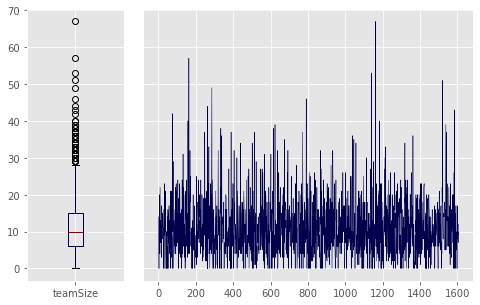

In [21]:
print(df['teamSize'].describe())
spread_plot(df['teamSize'])
plt.savefig('teamSize_raw.png', dpi=300, bbox_inches = 'tight', pad_inches=0)

count    1577.000000
mean        0.428916
std         0.273410
min         0.000000
25%         0.240000
50%         0.400000
75%         0.600000
max         1.000000
Name: teamSize, dtype: float64


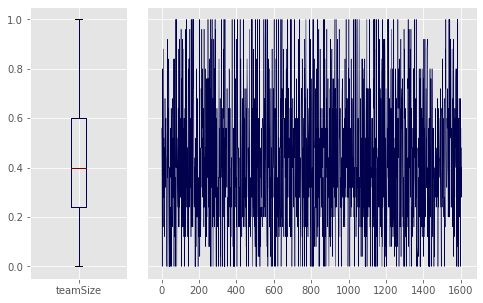

In [22]:
df.loc[(df.teamSize > 25), 'teamSize'] = 25

df['teamSize'] -= df['teamSize'].min()  # equivalent to df = df - df.min()
df['teamSize'] /= df['teamSize'].max()

print(df['teamSize'].describe())
spread_plot(df['teamSize'])
plt.savefig('teamSize_clean.png', dpi=300, bbox_inches = 'tight', pad_inches=0)

count    1577.000000
mean        2.848320
std         0.819743
min         0.800000
25%         2.300000
50%         2.800000
75%         3.500000
max         4.800000
Name: overallrating, dtype: float64


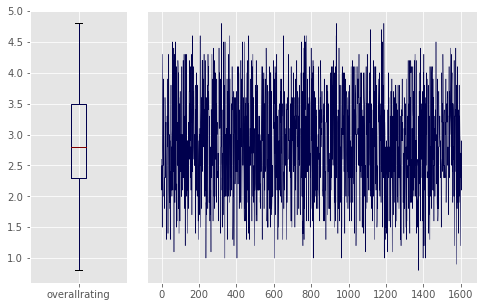

In [23]:
print(df['overallrating'].describe())
spread_plot(df['overallrating'])
plt.savefig('overallrating_raw.png', dpi=300, bbox_inches = 'tight', pad_inches=0)

count    1577.000000
mean        0.486450
std         0.215604
min         0.000000
25%         0.342105
50%         0.473684
75%         0.657895
max         1.000000
Name: overallrating, dtype: float64


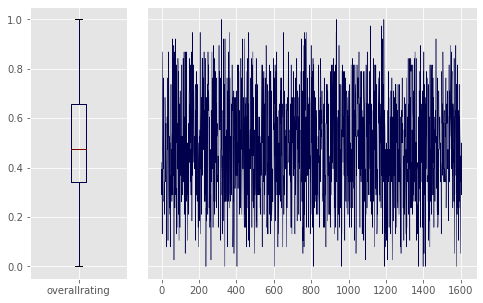

In [24]:
df.loc[(df.overallrating < 1), 'overallrating'] = 1

df['overallrating'] -= df['overallrating'].min()  # equivalent to df = df - df.min()
df['overallrating'] /= df['overallrating'].max()

print(df['overallrating'].describe())
spread_plot(df['overallrating'])
plt.savefig('overallrating_clean.png', dpi=300, bbox_inches = 'tight', pad_inches=0)

count    1577.000000
mean        0.636018
std         1.130752
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: socialMedia, dtype: float64


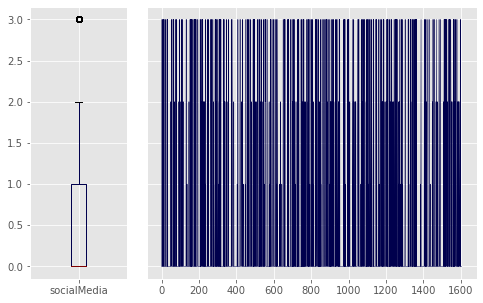

In [25]:
print(df['socialMedia'].describe())
spread_plot(df['socialMedia'])
plt.savefig('socialMedia_raw.png', dpi=300, bbox_inches = 'tight', pad_inches=0)

count    1577.000000
mean        0.212006
std         0.376917
min         0.000000
25%         0.000000
50%         0.000000
75%         0.333333
max         1.000000
Name: socialMedia, dtype: float64


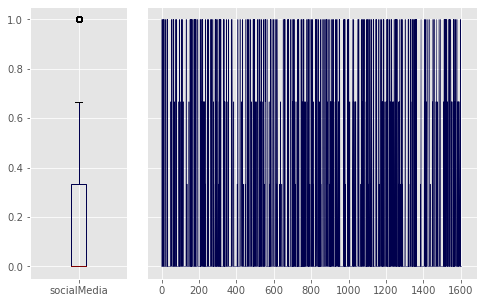

In [26]:
df['socialMedia'] -= df['socialMedia'].min()  # equivalent to df = df - df.min()
df['socialMedia'] /= df['socialMedia'].max()

print(df['socialMedia'].describe())
spread_plot(df['socialMedia'])
plt.savefig('socialMedia_clean.png', dpi=300, bbox_inches = 'tight', pad_inches=0)

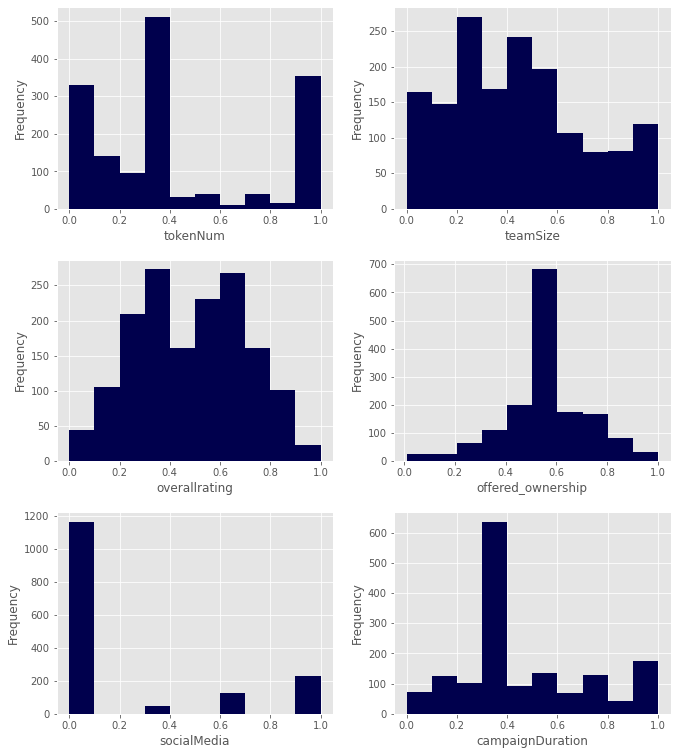

In [27]:
fig = plt.figure()
fig.set_figheight(13)
fig.set_figwidth(11)
plt.subplot2grid(shape=(3, 2), loc=(0, 0), colspan=1)
df.tokenNum.plot(kind='hist', colormap='seismic').set_xlabel('tokenNum')
plt.subplot2grid(shape=(3, 2), loc=(0, 1), colspan=1)
df.teamSize.plot(kind='hist', ax=plt.gca(), colormap='seismic').set_xlabel('teamSize')
plt.subplot2grid(shape=(3, 2), loc=(1, 0), colspan=1)
df.overallrating.plot(kind='hist', ax=plt.gca(), colormap='seismic').set_xlabel('overallrating')
plt.subplot2grid(shape=(3, 2), loc=(1, 1), colspan=1)
df.offered_ownership.plot(kind='hist', ax=plt.gca(), colormap='seismic').set_xlabel('offered_ownership')
plt.subplot2grid(shape=(3, 2), loc=(2, 0), colspan=1)
df.socialMedia.plot(kind='hist', ax=plt.gca(), colormap='seismic').set_xlabel('socialMedia')
plt.subplot2grid(shape=(3, 2), loc=(2, 1), colspan=1)
df.campaignDuration.plot(kind='hist', ax=plt.gca(), colormap='seismic').set_xlabel('campaignDuration')
plt.subplots_adjust(wspace=0.22, hspace=0.25)
plt.savefig('hist_clean.png', dpi=300, bbox_inches = 'tight', pad_inches=0)

In [28]:
unique_countries = set()
for entry in df.country.dropna().unique():
    unique_countries.add(entry.upper())

unique_countries.difference_update({
    'CZECHIA', 'DUBAI', 'ENGLAND', 'INDIA & AUSTRALIA', 'KOREA',
    'LATIN AMERICA', 'NETHERLAND', 'PERÚ', 'RAS AL-KHAIMAH',
    'RUSSIA, CHINA, USA', 'RUSSIAN', 'SERBIA, FRANCE', 'SG', 'SLOVAK REPUBLIC',
    'UKRAIN', 'UNITED ARAB EMIRATES', 'UNITED KINGDOM', 'UNITED STATES',
    'UNITED STATES OF AMERICA', 'СANADA', 'BRITISH VIRGIN ISLANDS'
})
unique_countries.difference_update({'WORLDWIDE'})
unique_countries.update({'SLOVAKIA'})

unique_countries

{'AFGHANISTAN',
 'ARGENTINA',
 'ARMENIA',
 'AUSTRALIA',
 'AUSTRIA',
 'BELARUS',
 'BELGIUM',
 'BELIZE',
 'BRAZIL',
 'BULGARIA',
 'CAMBODIA',
 'CANADA',
 'CAYMAN ISLANDS',
 'CHILE',
 'CHINA',
 'COLOMBIA',
 'COSTA RICA',
 'CROATIA',
 'CURACAO',
 'CYPRUS',
 'CZECH REPUBLIC',
 'DENMARK',
 'ECUADOR',
 'ESTONIA',
 'FINLAND',
 'FRANCE',
 'GEORGIA',
 'GERMANY',
 'GIBRALTAR',
 'GREECE',
 'GUINEA-BISSAU',
 'HONG KONG',
 'HUNGARY',
 'INDIA',
 'INDONESIA',
 'IRELAND',
 'ISLE OF MAN',
 'ISRAEL',
 'ITALY',
 'JAPAN',
 'JERSEY',
 'KAZAKHSTAN',
 'KENYA',
 'KYRGYZSTAN',
 'LAOS',
 'LATVIA',
 'LIECHTENSTEIN',
 'LITHUANIA',
 'LUXEMBOURG',
 'MALAYSIA',
 'MALTA',
 'MARSHALL ISLANDS',
 'MAURITIUS',
 'MEXICO',
 'MONACO',
 'NETHERLANDS',
 'NEW CALEDONIA',
 'NEW ZEALAND',
 'NIGERIA',
 'NORWAY',
 'PAKISTAN',
 'PANAMA',
 'PERU',
 'PHILIPPINES',
 'POLAND',
 'ROMANIA',
 'RUSSIA',
 'SAINT KITTS AND NEVIS',
 'SAINT LUCIA',
 'SERBIA',
 'SEYCHELLES',
 'SINGAPORE',
 'SLOVAKIA',
 'SLOVENIA',
 'SOUTH AFRICA',
 'SOUTH KOREA'

In [29]:
country_cols = []
for country in unique_countries:
    name = 'country_' + '_'.join(country.split())
    country_cols.append(name)
    df[name] = 0

for i, row in df.iterrows():
    if type(row['country']) != str:
        continue
    for country in unique_countries:
        if country in row['country'].upper():
            df.loc[i, 'country_' + '_'.join(country.split())] = 1
        if 'CZECHIA' in row['country'].upper():
            df.loc[i, 'country_CZECH_REPUBLIC'] = 1
        if 'ENGLAND' in row['country'].upper():
            df.loc[i, 'country_UK'] = 1
        if 'UNITED KINGDOM' in row['country'].upper():
            df.loc[i, 'country_UK'] = 1
        if 'KOREA' in row['country'].upper():
            df.loc[i, 'country_SOUTH_KOREA'] = 1
        if 'NETHERLAND' in row['country'].upper():
            df.loc[i, 'country_NETHERLANDS'] = 1
        if 'PERÚ' in row['country'].upper():
            df.loc[i, 'country_PERU'] = 1
        if 'SG' in row['country'].upper():
            df.loc[i, 'country_SINGAPORE'] = 1
        if 'SLOVAK REPUBLIC' in row['country'].upper():
            df.loc[i, 'country_SLOVAKIA'] = 1
        if 'UKRAIN' in row['country'].upper():
            df.loc[i, 'country_UKRAINE'] = 1
        if 'UNITED ARAB EMIRATES' in row['country'].upper():
            df.loc[i, 'country_UAE'] = 1
        if 'DUBAI' in row['country'].upper():
            df.loc[i, 'country_UAE'] = 1
        if 'RAS AL-KHAIMAH' in row['country'].upper():
            df.loc[i, 'country_UAE'] = 1
        if 'UNITED STATES' in row['country'].upper():
            df.loc[i, 'country_USA'] = 1
        if 'UNITED STATES OF AMERICA' in row['country'].upper():
            df.loc[i, 'country_USA'] = 1
        if 'СANADA' in row['country'].upper():
            df.loc[i, 'country_CANADA'] = 1
        # if 'LATIN AMERICA' in row['country'].upper():
        #     df.loc[i, 'country_WORLDWIDE'] = 1

for i, entry in enumerate(df[country_cols].sum()):
    print(country_cols[i], entry)

country_MEXICO 6
country_TAIWAN 6
country_CANADA 39
country_TANZANIA 1
country_MALAYSIA 7
country_HONG_KONG 43
country_PAKISTAN 2
country_NIGERIA 5
country_GERMANY 31
country_GREECE 2
country_KENYA 1
country_MONACO 1
country_SAINT_KITTS_AND_NEVIS 2
country_ROMANIA 8
country_VIRGIN_ISLANDS 22
country_SOUTH_KOREA 11
country_SWITZERLAND 78
country_NETHERLANDS 26
country_ISLE_OF_MAN 4
country_UAE 26
country_FRANCE 20
country_AFGHANISTAN 2
country_TURKEY 4
country_INDIA 19
country_ISRAEL 14
country_SERBIA 3
country_SEYCHELLES 14
country_VANUATU 1
country_BRAZIL 6
country_GIBRALTAR 20
country_LATVIA 12
country_USA 268
country_AUSTRALIA 30
country_MALTA 11
country_KYRGYZSTAN 1
country_LAOS 1
country_CROATIA 3
country_CURACAO 1
country_RUSSIA 155
country_UK 159
country_BELIZE 16
country_CAYMAN_ISLANDS 16
country_CHINA 15
country_MARSHALL_ISLANDS 4
country_COLOMBIA 2
country_INDONESIA 10
country_PANAMA 6
country_UKRAINE 20
country_IRELAND 2
country_CZECH_REPUBLIC 18
country_CYPRUS 14
country_CH

In [30]:
df = df.drop('country', axis=1)

In [31]:
unique_categories = set()
for entry in df.categories.dropna().unique():
    unique_categories.update(entry.upper().split(','))

# unique_categories.difference_update({'OTHER'})

unique_categories

{'ART',
 'ARTIFICIAL INTELLIGENCE',
 'BANKING',
 'BIG DATA',
 'BUSINESS SERVICES',
 'CASINO & GAMBLING',
 'CHARITY',
 'COMMUNICATION',
 'CRYPTOCURRENCY',
 'EDUCATION',
 'ELECTRONICS',
 'ENERGY',
 'ENTERTAINMENT',
 'HEALTH',
 'INFRASTRUCTURE',
 'INTERNET',
 'INVESTMENT',
 'LEGAL',
 'MANUFACTURING',
 'MEDIA',
 'OTHER',
 'PLATFORM',
 'REAL ESTATE',
 'RETAIL',
 'SMART CONTRACT',
 'SOFTWARE',
 'SPORTS',
 'TOURISM',
 'VIRTUAL REALITY'}

In [32]:
categories_cols = []
for category in unique_categories:
    name = 'category_' + '_'.join(category.split())
    categories_cols.append(name)
    df[name] = 0

for i, row in df.iterrows():
    if type(row['categories']) != str:
        continue
    for category in unique_categories:
        if category in row['categories'].upper():
            df.loc[i, 'category_' + '_'.join(category.split())] = 1

for i, entry in enumerate(df[categories_cols].sum()):
    print(categories_cols[i], entry)

category_BANKING 150
category_PLATFORM 779
category_CRYPTOCURRENCY 602
category_LEGAL 19
category_ELECTRONICS 17
category_MEDIA 94
category_INTERNET 174
category_TOURISM 47
category_CHARITY 24
category_HEALTH 63
category_OTHER 59
category_SOFTWARE 224
category_CASINO_&_GAMBLING 51
category_ENTERTAINMENT 185
category_INFRASTRUCTURE 123
category_REAL_ESTATE 67
category_RETAIL 79
category_EDUCATION 43
category_MANUFACTURING 33
category_COMMUNICATION 112
category_INVESTMENT 289
category_SPORTS 40
category_ART 194
category_ENERGY 37
category_ARTIFICIAL_INTELLIGENCE 72
category_BUSINESS_SERVICES 371
category_BIG_DATA 69
category_SMART_CONTRACT 128
category_VIRTUAL_REALITY 21


In [33]:
df = df.drop('categories', axis=1)

In [34]:
def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    return chi2_contingency(ctsum.fillna(0))[0:2]

chisq_of_df_cols(df, 'tokenType', 'platform')

(21714.92963035027, 0.0)

In [35]:
df = df.drop('tokenType', axis=1)

In [36]:
unique_platforms = set()
for entry in df.platform.dropna().unique():
    unique_platforms.add(entry.upper())

unique_platforms.difference_update({
    'BITCOIN, SCRYPT', 'BITSHARES 2.0', 'BTC', 'CORION PLATFORM',
    'CRYPTONOTE-BASED BLOCKCHAIN', 'EHTEREUM', 'ETH', 'ETHEREUM AND WAVES',
    'ETHEREUM, BITCOIN', 'FILECOIN NETWORK', 'INFINITY BLOCKCHAIN',
    'IOLITE BLOCKCHAIN', 'MAHRA PLATFORM', 'MULTICHAIN', 'NEBL',
    'NEW BLOCKCHAIN', 'POS', 'PROPRIETARY', 'SEPARATE BLOCKCHAIN',
    'STELLAR CONSENSUS PROTOCOL (SCP)'
})
unique_platforms.update({
    'CORION', 'FILECOIN', 'INFINITY', 'IOLITE', 'MAHRA'
})
# unique_platforms.add('OTHER')

unique_platforms

{'ARDOR',
 'BITCOIN',
 'BITSHARES',
 'CNET',
 'CORION',
 'COUNTERPARTY',
 'CRYPTOKAMI',
 'CRYPTONOTE',
 'ELECTRONEUM',
 'EOS',
 'ETHEREUM',
 'EXPANSE',
 'FILECOIN',
 'GRAPHENE',
 'HYPERLEDGER',
 'INFINITY',
 'IOLITE',
 'IOTA',
 'KECCAK',
 'LITECOIN',
 'MAHRA',
 'NEBLIO',
 'NEM',
 'NEO',
 'NEUROCHAIN',
 'NILECHAIN',
 'NXT',
 'OMNI',
 'QRC',
 'QTUM',
 'RIPEMD160',
 'SCRYPT',
 'SPECTROCOIN',
 'STEEM',
 'STELLAR',
 'STREAMSPACE',
 'TENDERMINT',
 'THEPOWER',
 'UNIVERSA',
 'VASYA',
 'VECHAIN',
 'WAVES',
 'X11',
 'X13'}

In [37]:
platform_cols = []
for platform in unique_platforms:
    name = 'platform_' + platform
    platform_cols.append(name)
    df[name] = 0

for i, row in df.iterrows():
    if type(row['platform']) != str:
        continue
    for platform in unique_platforms:
        if platform in row['platform'].upper():
            df.loc[i, 'platform_' + platform] = 1
        if 'BTC' in row['platform'].upper():
            df.loc[i, 'platform_BITCOIN'] = 1
        if 'EHTEREUM' in row['platform'].upper():
            df.loc[i, 'platform_ETHEREUM'] = 1
        if 'ETH' in row['platform'].upper():
            df.loc[i, 'platform_ETHEREUM'] = 1
        if 'NEBL' in row['platform'].upper():
            df.loc[i, 'platform_NEBLIO'] = 1
        # if 'MULTICHAIN' in row['platform'].upper():
        #     df.loc[i, 'platform_OTHER'] = 1
        # if 'NEW BLOCKCHAIN' in row['platform'].upper():
        #     df.loc[i, 'platform_OTHER'] = 1
        # if 'POS' in row['platform'].upper():
        #     df.loc[i, 'platform_OTHER'] = 1
        # if 'PROPRIETARY' in row['platform'].upper():
        #     df.loc[i, 'platform_OTHER'] = 1
        # if 'SEPARATE BLOCKCHAIN' in row['platform'].upper():
        #     df.loc[i, 'platform_OTHER'] = 1

df[platform_cols].sum()

platform_OMNI               3
platform_BITSHARES          5
platform_ARDOR              1
platform_VASYA              1
platform_KECCAK             1
platform_NEUROCHAIN         1
platform_ETHEREUM        1289
platform_NILECHAIN          1
platform_EOS                1
platform_COUNTERPARTY       2
platform_CRYPTONOTE         2
platform_SPECTROCOIN        1
platform_FILECOIN           1
platform_TENDERMINT         1
platform_STREAMSPACE        1
platform_QTUM               2
platform_WAVES             62
platform_NXT                2
platform_EXPANSE            1
platform_X11                2
platform_HYPERLEDGER        1
platform_X13                1
platform_VECHAIN            1
platform_STEEM              1
platform_IOLITE             1
platform_CORION             1
platform_CRYPTOKAMI         1
platform_NEM                7
platform_NEO                7
platform_LITECOIN           2
platform_MAHRA              1
platform_GRAPHENE           1
platform_QRC                2
platform_B

In [38]:
df = df.drop('platform', axis=1)
# platform_cols.remove('platform_ETHEREUM')
# platform_cols.append('platform')
#
# df = df.drop(platform_cols, axis=1)

In [39]:
unique_tokens = set()
for entry in df.acceptingCurrency.dropna().unique():
    entry = re.sub(r'\W+', ' ', entry)
    entry = entry.upper()
    unique_tokens.update(entry.split())

unique_tokens.difference_update({
    'ALTCOINS', 'AND', 'BITSHARES', 'LIGHTCOIN', 'NEM',
    'LITECOIN', 'LTС', 'MONERO', 'VARIOUS', 'ЕТН'
})
unique_tokens.difference_update({'OTHER'})

unique_tokens

{'ACE',
 'ADA',
 'AGR',
 'ALT',
 'BCC',
 'BCH',
 'BCY',
 'BHT',
 'BLK',
 'BNB',
 'BTC',
 'BTG',
 'BTH',
 'BTS',
 'CHF',
 'COSS',
 'DALC',
 'DASH',
 'DCR',
 'DCT',
 'DOGE',
 'DSH',
 'ECH',
 'EOS',
 'ETC',
 'ETH',
 'ETP',
 'EUR',
 'EXP',
 'FAIR',
 'FIAT',
 'GAME',
 'GAS',
 'GBP',
 'GRC',
 'LA',
 'LSK',
 'LTC',
 'LTD',
 'MAID',
 'MIOTA',
 'NEO',
 'NEOGAS',
 'NXT',
 'PPC',
 'QTUM',
 'SALT',
 'SGD',
 'SIB',
 'STR',
 'SYS',
 'TIME',
 'USD',
 'USDT',
 'VET',
 'WAVES',
 'WIRE',
 'XBT',
 'XEM',
 'XLM',
 'XMR',
 'XRP',
 'XVG',
 'ZAR',
 'ZEC',
 'ZEN'}

In [40]:
accepting_tokens_cols = []
for token in unique_tokens:
    name = 'accepting_' + token
    accepting_tokens_cols.append(name)
    df[name] = 0

for i, row in df.iterrows():
    if type(row['acceptingCurrency']) != str:
        continue
    for token in unique_tokens:
        if token in row['acceptingCurrency'].upper():
            df.loc[i, 'accepting_' + token] = 1
        # if 'ALTCOINS' in row['acceptingCurrency'].upper():
        #     df.loc[i, 'accepting_OTHER'] = 1
        # if 'VARIOUS' in row['acceptingCurrency'].upper():
        #     df.loc[i, 'accepting_OTHER'] = 1
        if 'BITSHARES' in row['acceptingCurrency'].upper():
            df.loc[i, 'accepting_BTS'] = 1
        if 'LIGHTCOIN' in row['acceptingCurrency'].upper():
            df.loc[i, 'accepting_LTC'] = 1
        if 'LITECOIN' in row['acceptingCurrency'].upper():
            df.loc[i, 'accepting_LTC'] = 1
        if 'LTС' in row['acceptingCurrency'].upper():
            df.loc[i, 'accepting_LTC'] = 1
        if 'MONERO' in row['acceptingCurrency'].upper():
            df.loc[i, 'accepting_XMR'] = 1
        if 'NEM' in row['acceptingCurrency'].upper():
            df.loc[i, 'accepting_XEM'] = 1
        if 'ЕТН' in row['acceptingCurrency'].upper():
            df.loc[i, 'accepting_ETH'] = 1

for i, entry in enumerate(df[accepting_tokens_cols].sum()):
    print(accepting_tokens_cols[i], entry)

accepting_LSK 1
accepting_USD 29
accepting_BHT 1
accepting_EXP 1
accepting_CHF 2
accepting_ADA 2
accepting_MIOTA 2
accepting_BCY 1
accepting_LTD 1
accepting_NXT 2
accepting_VET 1
accepting_FIAT 136
accepting_STR 1
accepting_ETP 1
accepting_MAID 1
accepting_XRP 29
accepting_ACE 1
accepting_XLM 7
accepting_GAME 1
accepting_GAS 2
accepting_EOS 6
accepting_WIRE 2
accepting_ZAR 1
accepting_USDT 3
accepting_WAVES 39
accepting_BLK 1
accepting_COSS 1
accepting_XEM 14
accepting_BTH 3
accepting_DCR 1
accepting_BCH 57
accepting_ZEN 1
accepting_BTC 592
accepting_FAIR 1
accepting_LA 2
accepting_DSH 1
accepting_EUR 5
accepting_ALT 3
accepting_SYS 1
accepting_GBP 1
accepting_QTUM 4
accepting_SALT 1
accepting_BCC 9
accepting_ETH 1296
accepting_PPC 1
accepting_ECH 1
accepting_AGR 1
accepting_XVG 1
accepting_BNB 1
accepting_XBT 1
accepting_DOGE 10
accepting_NEOGAS 1
accepting_DASH 77
accepting_DALC 1
accepting_SIB 1
accepting_SGD 1
accepting_BTS 5
accepting_XMR 18
accepting_DCT 1
accepting_ZEC 27
accept

In [41]:
df = df.drop('acceptingCurrency', axis=1)
# accepting_tokens_cols.remove('accepting_ETH')
# accepting_tokens_cols.remove('accepting_BTC')
# accepting_tokens_cols.remove('accepting_LTC')
# accepting_tokens_cols.append('acceptingCurrency')
#
# df = df.drop(accepting_tokens_cols, axis=1)

In [42]:
pd.set_option('display.max_columns', 240)
pd.set_option('display.max_rows', 240)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1577 entries, 0 to 1605
Columns: 240 entries, success to accepting_ETC
dtypes: float64(10), int64(230)
memory usage: 2.9 MB


,success,tokenNum,teamSize,overallrating,offered_ownership,softcap,hardcap,whitepaper,video,socialMedia,campaignDuration,country_MEXICO,country_TAIWAN,country_CANADA,country_TANZANIA,country_MALAYSIA,country_HONG_KONG,country_PAKISTAN,country_NIGERIA,country_GERMANY,country_GREECE,country_KENYA,country_MONACO,country_SAINT_KITTS_AND_NEVIS,country_ROMANIA,country_VIRGIN_ISLANDS,country_SOUTH_KOREA,country_SWITZERLAND,country_NETHERLANDS,country_ISLE_OF_MAN,country_UAE,country_FRANCE,country_AFGHANISTAN,country_TURKEY,country_INDIA,country_ISRAEL,country_SERBIA,country_SEYCHELLES,country_VANUATU,country_BRAZIL,country_GIBRALTAR,country_LATVIA,country_USA,country_AUSTRALIA,country_MALTA,country_KYRGYZSTAN,country_LAOS,country_CROATIA,country_CURACAO,country_RUSSIA,country_UK,country_BELIZE,country_CAYMAN_ISLANDS,country_CHINA,country_MARSHALL_ISLANDS,country_COLOMBIA,country_INDONESIA,country_PANAMA,country_UKRAINE,country_IRELAND,country_CZECH_REPUBLIC,country_CYPRUS,country_CHILE,country_JAPAN,country_SLOVENIA,country_POLAND,country_LIECHTENSTEIN,country_ECUADOR,country_GUINEA-BISSAU,country_PHILIPPINES,country_SAINT_LUCIA,country_BELGIUM,country_SLOVAKIA,country_NEW_CALEDONIA,country_ARGENTINA,country_GEORGIA,country_AUSTRIA,country_ITALY,country_PERU,country_BELARUS,country_SOUTH_AFRICA,country_LITHUANIA,country_HUNGARY,country_NEW_ZEALAND,country_NORWAY,country_VIETNAM,country_MAURITIUS,country_FINLAND,country_SWEDEN,country_KAZAKHSTAN,country_ARMENIA,country_LUXEMBOURG,country_COSTA_RICA,country_THAILAND,country_ESTONIA,country_CAMBODIA,country_BULGARIA,country_SINGAPORE,country_SPAIN,country_DENMARK,country_JERSEY,category_BANKING,category_PLATFORM,category_CRYPTOCURRENCY,category_LEGAL,category_ELECTRONICS,category_MEDIA,category_INTERNET,category_TOURISM,category_CHARITY,category_HEALTH,category_OTHER,category_SOFTWARE,category_CASINO_&_GAMBLING,category_ENTERTAINMENT,category_INFRASTRUCTURE,category_REAL_ESTATE,category_RETAIL,category_EDUCATION,category_MANUFACTURING,category_COMMUNICATION,category_INVESTMENT,category_SPORTS,category_ART,category_ENERGY,category_ARTIFICIAL_INTELLIGENCE,category_BUSINESS_SERVICES,category_BIG_DATA,category_SMART_CONTRACT,category_VIRTUAL_REALITY,platform_OMNI,platform_BITSHARES,platform_ARDOR,platform_VASYA,platform_KECCAK,platform_NEUROCHAIN,platform_ETHEREUM,platform_NILECHAIN,platform_EOS,platform_COUNTERPARTY,platform_CRYPTONOTE,platform_SPECTROCOIN,platform_FILECOIN,platform_TENDERMINT,platform_STREAMSPACE,platform_QTUM,platform_WAVES,platform_NXT,platform_EXPANSE,platform_X11,platform_HYPERLEDGER,platform_X13,platform_VECHAIN,platform_STEEM,platform_IOLITE,platform_CORION,platform_CRYPTOKAMI,platform_NEM,platform_NEO,platform_LITECOIN,platform_MAHRA,platform_GRAPHENE,platform_QRC,platform_BITCOIN,platform_UNIVERSA,platform_IOTA,platform_INFINITY,platform_RIPEMD160,platform_NEBLIO,platform_SCRYPT,platform_THEPOWER,platform_STELLAR,platform_ELECTRONEUM,platform_CNET,accepting_LSK,accepting_USD,accepting_BHT,accepting_EXP,accepting_CHF,accepting_ADA,accepting_MIOTA,accepting_BCY,accepting_LTD,accepting_NXT,accepting_VET,accepting_FIAT,accepting_STR,accepting_ETP,accepting_MAID,accepting_XRP,accepting_ACE,accepting_XLM,accepting_GAME,accepting_GAS,accepting_EOS,accepting_WIRE,accepting_ZAR,accepting_USDT,accepting_WAVES,accepting_BLK,accepting_COSS,accepting_XEM,accepting_BTH,accepting_DCR,accepting_BCH,accepting_ZEN,accepting_BTC,accepting_FAIR,accepting_LA,accepting_DSH,accepting_EUR,accepting_ALT,accepting_SYS,accepting_GBP,accepting_QTUM,accepting_SALT,accepting_BCC,accepting_ETH,accepting_PPC,accepting_ECH,accepting_AGR,accepting_XVG,accepting_BNB,accepting_XBT,accepting_DOGE,accepting_NEOGAS,accepting_DASH,accepting_DALC,accepting_SIB,accepting_SGD,accepting_BTS,accepting_XMR,accepting_DCT,accepting_ZEC,accepting_LTC,accepting_TIME,accepting_GRC,accepting_BTG,accepting_NEO,accepting_ETC
count,1577.00000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577

In [43]:
df.to_csv('ICO_cleaned_v4.csv', index=False)